# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [252]:
import matplotlib.pyplot as plt
import mplleaflet

df = pd.read_csv('data/C2A2_data/BinSize_d400.csv')
station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

In [253]:
%%capture
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(lons, lats, c='r', alpha=0.7, s=200)

In [254]:
mplleaflet.display(fig = fig)

In [2]:
import pandas as pd
import numpy as np

def get_x_y():
    
    df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
    df.index = pd.to_datetime(df["Date"]) #create datetime index
    df = df[~((df.index.month == 2) & (df.index.day == 29))] #filter out rows of feb. 29th data
    df["Month/Day"] = df["Date"].str.extract(r'-(.*)', expand = False)
    #df["Month/Day"]=["{}/{}".format(df.index.month[i],df.index.day[i]) for i in range(len(df.index))]
    #List comprehension takes a very long time - used vectorized operation instead

    TMAX10yrs = (df.loc[(df["Element"]=="TMAX") & (df["Date"] >= "2005-01-01") & (df["Date"] < "2015-01-01")]
            .groupby("Month/Day")
            .agg("max"))
    TMIN10yrs = (df.loc[(df["Element"]=="TMIN") & (df["Date"] >= "2005-01-01") & (df["Date"] < "2015-01-01")]
            .groupby("Month/Day")
            .agg("min"))
    TMAX10yrs["X_Value"] = pd.to_datetime(("2005-" + TMAX10yrs.index))
    TMIN10yrs["X_Value"] = pd.to_datetime(("2005-" + TMIN10yrs.index))
    #group by the unique Month/Day and return 1) The max temp for each row 2) The min temp for each row
    #create datetime variable for plotting
    
    TMAX_2015 = (df.loc[(df["Element"] == "TMAX") & (df["Date"] >= "2015-01-01") & (df["Date"] < "2016-01-01")]
                 .groupby("Month/Day")
                 .agg("max"))
    TMIN_2015 = (df.loc[(df["Element"] == "TMIN") & (df["Date"] >= "2015-01-01") & (df["Date"] < "2016-01-01")]
                 .groupby("Month/Day")
                 .agg("min"))
    TMAX_2015["X_Value"] = pd.to_datetime(("2005-" + TMAX_2015.index))
    TMIN_2015["X_Value"] = pd.to_datetime(("2005-" + TMIN_2015.index))
    #same thing as above but for dates 2015-2016
        
    TMAX_2015_record = TMAX_2015.loc[TMAX_2015["Data_Value"] > TMAX10yrs["Data_Value"]]
    TMIN_2015_record = TMIN_2015.loc[TMIN_2015["Data_Value"] < TMIN10yrs["Data_Value"]]
    #return the rows of dates in 2015 that broke the max/min record of the previous 10 yrs    
        
    x = {"x_vals_TMAX10":TMAX10yrs["X_Value"], 
         "x_vals_TMIN10":TMIN10yrs["X_Value"],
        "x_vals_TMAX_2015_record":list(TMAX_2015_record["X_Value"]),
        "x_vals_TMIN_2015_record":list(TMIN_2015_record["X_Value"]),
        }
    y = {"y_vals_TMAX10": TMAX10yrs["Data_Value"],
         "y_vals_TMIN10": TMIN10yrs["Data_Value"],
         "y_vals_TMAX_2015_record": TMAX_2015_record["Data_Value"],
         "y_vals_TMIN_2015_record": TMIN_2015_record["Data_Value"],
        }
    
    return(x,y)

<IPython.core.display.Javascript object>


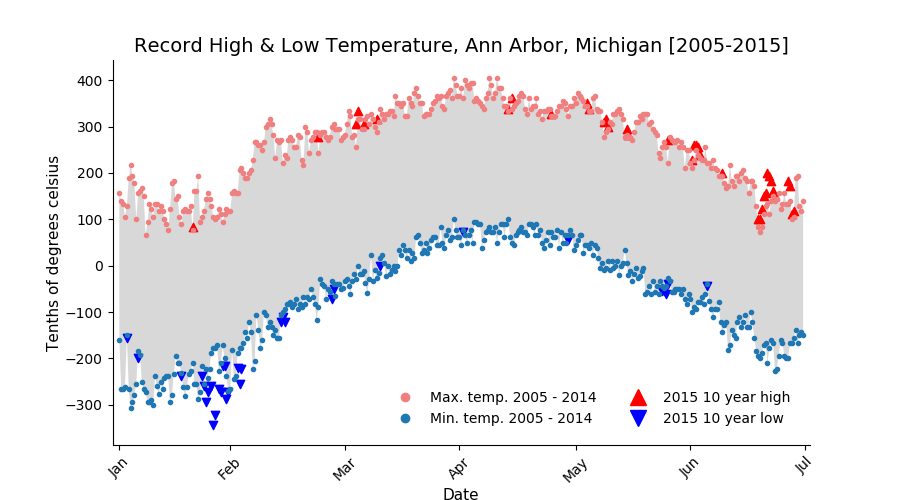

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl

def line_graph_high_low(x_y):
    
    x,y = x_y[0],x_y[1] #unpack dictionaries containing x,y coordinates
    fig, ax = plt.subplots(1,1, figsize = (9,5))
    
    artist1, = ax.plot(x["x_vals_TMAX10"],y["y_vals_TMAX10"], ".", color = "lightcoral")
    artist2, = ax.plot(x["x_vals_TMIN10"],y["y_vals_TMIN10"], ".", color = "tab:blue")
    ax.fill_between(np.arange(np.datetime64("2005-01-01"),np.datetime64("2006-01-01")),
                           y["y_vals_TMAX10"], 
                           y["y_vals_TMIN10"],
                          facecolor = "grey",
                          alpha = 0.30)
    #create scatter plot of max & min temps. by day from 2010-2015
    ax.scatter(x["x_vals_TMAX_2015_record"],y["y_vals_TMAX_2015_record"], marker = "^", color = "red")
    proxy1, = ax.plot([],[],"^", color = "red") #create proxy so it can be added to the legend.
    #removed the word 'marker' and legend doesn't show lines around the marker image
    ax.scatter(x["x_vals_TMIN_2015_record"],y["y_vals_TMIN_2015_record"], marker = "v", color = "blue")
    proxy2, = ax.plot([],[],"v", color = "blue") #create proxy so it can be added to the legend
    #Add the 2015 data for record breaking max & min temperatures
    
    ax.set_title("Record High & Low Temperature, Ann Arbor, Michigan [2005-2015]", fontdict = {'fontsize' : 14}) #create title
    mpl.rcParams["axes.titlepad"] = 15 #set titlepad
    ax.set_ylabel("Tenths of degrees celsius", fontsize = 11, labelpad = 2) 
    ax.set_yticks(np.arange(-300,401,100))
    ax.set_xlabel("Date", fontsize = 11, labelpad = 2)
    ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], 
               fontsize = "medium", rotation = 45)
    #format and label x and y axes
      
    ax.legend([artist1,artist2,proxy1,proxy2],
              ["Max. temp. 2005 - 2014", "Min. temp. 2005 - 2014","2015 10 year high","2015 10 year low"], 
              loc = "lower right",
              ncol = 2,
              fontsize = "medium",
              borderaxespad = 1.0,
              markerscale = 2.0,
              frameon=False)
    #create and format a legend
    
    ax.margins(x=0.01) #remove white space to the left and right of the data
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #remove upper and right spines
    
    #plt.savefig("Record High & Low Temps.png")
    #plt.close(fig)

line_graph_high_low(get_x_y())